In [37]:
import numpy as np
import pandas as pd
import scipy.io as sio
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import pdb
from Patch_ana import patch_pip
import seaborn as sns

% matplotlib inline
%load_ext autoreload
% autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [39]:
data= pd.read_csv('/data/Good data_store.csv')
data.head()

,File name,Age,Pip number,E-I,Reci,Artifact,IS100,Trial number before,Trial number after,Protocol,Elimi,Notes,Ptl_note,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17
0,2.016073e+09,27.0,3.0,0.0,0.0,0.0,1.0,"26,27,28,29","31,32,33,34,35",1.0,0.0,NaN,50Hz IE preonly,NaN,NaN,NaN,NaN,NaN
1,2.017022e+09,30.0,3.0,0.0,0.0,0.0,2.0,"12,13","16,17",1.0,0.0,NaN,50Hz IE preonly,NaN,NaN,NaN,NaN,NaN
2,2.016091e+09,30.0,2.0,0.0,0.0,0.0,1.0,"14,15","17,18",1.0,1.0,NaN,50Hz IE preonly,NaN,NaN,NaN,NaN,NaN
3,2.017062e+09,24.0,1.0,0.0,0.0,0.0,1.0,"30,31,32","34,35",1.0,0.0,"No change, good data",50Hz IE preonly,NaN,NaN,NaN,NaN,NaN
4,2.016073e+09,29.0,1.0,0.0,1.0,0.0,0.0,43,"45,46,47,48,49",1.0,0.0,NaN,50Hz IE preonly,NaN,NaN,NaN,NaN,NaN


In [40]:
data['Ptl_note'].value_counts()

50Hz EI preonly          12
50Hz EI high freq        12
E_I_2Hz_associative      12
E_I_2Hz_Associ_AM251     11
50Hz EI postonly         10
EI_low high              10
EI_antihebbian           10
50Hz IE postonly          9
50Hz IE preonly           9
50Hz IE high freq         8
E_I_preonly_low           7
No ptl                    7
E_I_2Hz_POST_AM251        7
EI_high_low               5
50Hz II high freq         5
 Naspm 100 uM             5
IE_high low               4
E_i_postsynapti_low       4
IE_high_low               4
E_I_50Hz_Associ_AM251     3
E_I_postsynapti_low       2
Naspm 100 uM              2
50 Hz II preonly          1
-67.5                     1
50 hZ II preonly          1
pre only after Naspm      1
Name: Ptl_note, dtype: int64

In [41]:
data_am_asso = data[(data['Ptl_note']=='E_I_2Hz_Associ_AM251')&(data['Reci']==1)]

In [42]:
# data_am_asso.drop(156, axis=0, inplace=True)
# data_am_asso.drop(157, axis=0, inplace=True)
# data_am_asso.drop(164, axis=0, inplace=True)

In [43]:
data_am_asso

,File name,Age,Pip number,E-I,Reci,Artifact,IS100,Trial number before,Trial number after,Protocol,Elimi,Notes,Ptl_note,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17
154,2.017121e+09,28.0,4.0,1.0,1.0,0.0,1.0,"41,42",44,21.0,5.0,Potentiation,E_I_2Hz_Associ_AM251,NaN,NaN,NaN,NaN,NaN
155,2.017122e+09,30.0,2.0,1.0,1.0,0.0,1.0,7,9,21.0,0.0,Potentiation,E_I_2Hz_Associ_AM251,NaN,NaN,NaN,NaN,NaN
156,2.017122e+09,23.0,2.0,1.0,1.0,0.0,1.0,6,"8,9",21.0,0.0,LTD,E_I_2Hz_Associ_AM251,NaN,NaN,NaN,NaN,NaN
157,2.017122e+09,23.0,2.0,1.0,1.0,0.0,1.0,6,8,21.0,20.0,LTD,E_I_2Hz_Associ_AM251,NaN,NaN,NaN,NaN,NaN
158,2.017123e+09,30.0,3.0,1.0,1.0,1.0,1.0,"64,65,66","68,69,70,71,69,70,71",21.0,0.0,Potentiation,E_I_2Hz_Associ_AM251,NaN,NaN,NaN,NaN,NaN
159,2.017123e+09,31.0,4.0,1.0,1.0,1.0,1.0,"16,17","19,20",21.0,11.0,Potentiation,E_I_2Hz_Associ_AM251,NaN,NaN,NaN,NaN,NaN
160,2.017123e+09,32.0,3.0,1.0,1.0,0.0,1.0,"7,7","9,10,11,12",21.0,5.0,Potentiation,E_I_2Hz_Associ_AM251,NaN,NaN,NaN,NaN,NaN
161,2.017123e+09,32.0,3.0,1.0,1.0,0.0,1.0,"27,28","30,31",21.0,0.0,Potentiation,E_I_2Hz_Associ_AM251,NaN,NaN,NaN,NaN,NaN
163,2.018013e+09,30.0,2.0,1.0,1.0,0.0,1.0,"24,25,26",28,21.0,8.0,Potentiation,E_I_2Hz_Associ_AM251,NaN,NaN,NaN,NaN,NaN
164,2.018021e+09,32.0,3.0,1.0,1.0,0.0,1.0,"59,59",62,21.0,0.0,Potentiation,E_I_2Hz_Associ_AM251,NaN,NaN,NaN,NaN,NaN


In [44]:
# # Process all the before trial
isi=1   # Use only the 100 ms
trial_output = {}

data_tmp = data_am_asso
for j in range(len(data_tmp)):
    test_name = str(int(data_tmp['File name'].iloc[j]))
    if len(test_name)==12:
        test_name = test_name[:-2]
    test_name = '/data/test'+ test_name
    test_data = sio.loadmat(test_name)
    test_pip = data_tmp.iloc[j]['Pip number']
    test_trace_idx_bef = data_tmp.iloc[j]['Trial number before']
    test_trace_idx_aft = data_tmp.iloc[j]['Trial number after']
    ifartifact = data_tmp.iloc[j]['Artifact']
    isi = data_tmp.iloc[j]['IS100']
    bef_index = [int(s)-1 for s in str.split(test_trace_idx_bef, ',')]
    aft_index = [int(s)-1 for s in str.split(test_trace_idx_aft, ',')]
    trial_output[data_tmp['File name'].iloc[j].astype(str)]= patch_pip.bef_aft_ana(trial=test_data['test'][0], bef_index=bef_index, aft_index=aft_index, test_pip=test_pip, isi=isi, ifartifact=ifartifact, ave_len=3,  iffigure=0)

data_am_asso = pd.DataFrame(trial_output, index=['Before', 'After']).transpose()
data_am_asso.to_pickle('data_am_asso')

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [33]:
data_am_asso = pd.read_pickle('data_am_asso')

/usr/local/lib/python3.5/dist-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


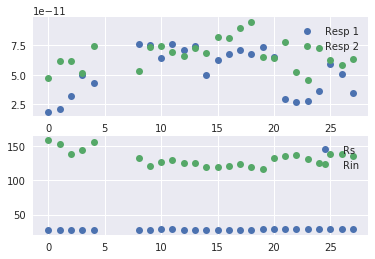

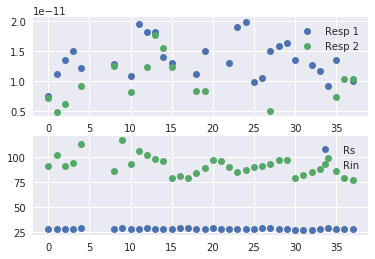

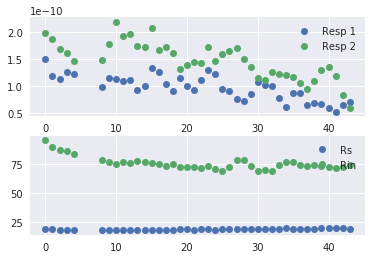

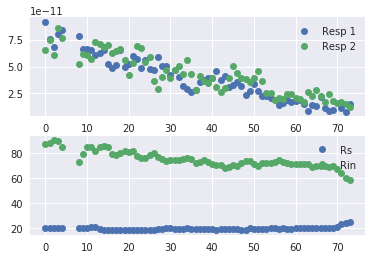

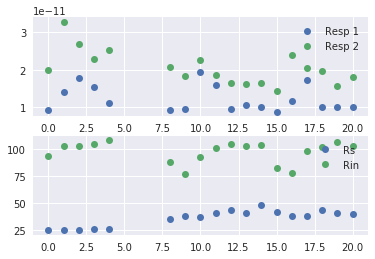

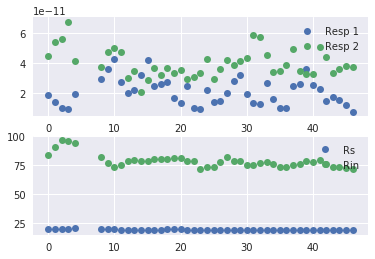

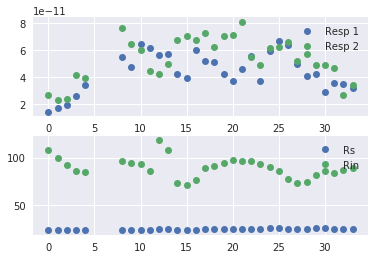

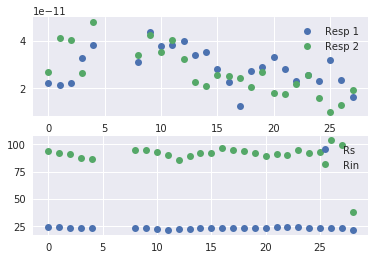

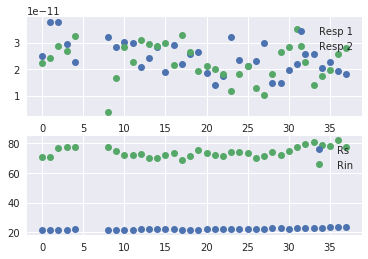

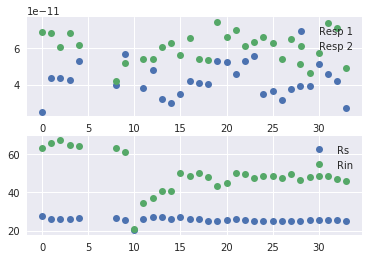

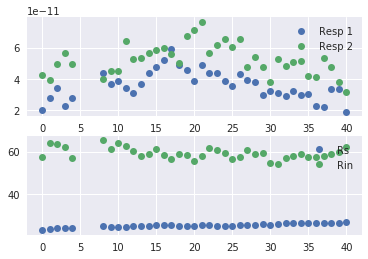

In [34]:
data_ana = data_am_asso
ave_ptl_resp = np.zeros((len(data_ana), 60))

for i in range(len(data_ana)):
    bef_amp1 = data_ana.iloc[i]['Before']['ave_amp1'][-5:]
    aft_amp1 = data_ana.iloc[i]['After']['ave_amp1']
    bef_amp2 = data_ana.iloc[i]['Before']['ave_amp2'][-5:]
    aft_amp2 = data_ana.iloc[i]['After']['ave_amp2']
    bef_rs = data_ana.iloc[i]['Before']['rs'][-5:]
    aft_rs = data_ana.iloc[i]['After']['rs']
    bef_ir = data_ana.iloc[i]['Before']['ir'][-5:]
    aft_ir = data_ana.iloc[i]['After']['ir']
    rs_joint= np.concatenate([bef_rs, np.ones((3,1))*np.nan, aft_rs])
    ir_joint= np.concatenate([bef_ir, np.ones((3,1))*np.nan, aft_ir])
    resp1_joint= np.concatenate([bef_amp1, np.ones((3,1))*np.nan, aft_amp1])
    resp2_joint = np.concatenate([bef_amp2, np.ones((3,1))*np.nan, aft_amp2])
    ave_ptl_resp[i,:5] = bef_amp1[-5:].reshape(1,-1)
    end_trace = np.min((48, len(aft_amp1)))
    ave_ptl_resp[i,12:12+end_trace] = aft_amp1[:end_trace].reshape(1,-1)
    plt.figure()
    fig, ax = plt.subplots(2,1)
    ax[0].plot(resp1_joint, 'o', label='Resp 1')
    ax[0].plot(resp2_joint, 'o', label='Resp 2')
    ax[0].legend(loc='upper right')
    ax[1].plot(rs_joint, 'o', label='Rs')
    ax[1].plot(ir_joint, 'o', label='Rin')
    ax[1].legend(loc='upper right')
    
ave_ptl_mean = np.nanmean(ave_ptl_resp, axis=0)
ave_ptl_ste = np.nanstd(ave_ptl_resp, axis=0)/np.sqrt(i)

<Container object of 3 artists>

/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


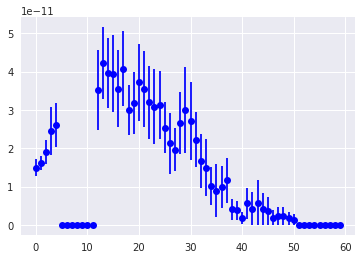

In [42]:
plt.errorbar(x=np.arange(len(ave_ptl_mean)), y=ave_ptl_mean, yerr=ave_ptl_ste, fmt='bo')

In [24]:
elimi = np.array([20, 30, 20, 40, 25, 20, 23])
elimi_sr = pd.Series(elimi, index=data_am_asso.index)
data_am_asso['elimi']=elimi_sr

In [25]:
data_am_asso.to_pickle('ana_am_asso')